# Assignment 1

## Part 1: Exploring the friendship paradox.

### The friendship paradox in BA networks

#### Pick a node i at random (e.g. use random.choice). Find its degree

In [2]:
import random
import networkx as nx

# First we generate the Barabási-Albert network
F_BA = nx.barabasi_albert_graph(5000, 2)  

# Picking a random node
random_node = random.choice(list(F_BA.nodes))

# Finding the degree of the node
node_degree = F_BA.degree(random_node)

print(f"The random node (i) is {random_node}, and the degree of node i = {node_degree}")

The random node (i) is 4834, and the degree of node i = 2


#### Find i's neighbors. And calculate their average degree.

In [3]:
neighbors = list(F_BA.neighbors(random_node))

neighbors_degrees = [F_BA.degree(neighbor) for neighbor in neighbors]

print(f"Neighbors of Node {random_node}: {neighbors}")
print(f"Degrees of Neighbors: {neighbors_degrees}")

Neighbors of Node 4834: [206, 4102]
Degrees of Neighbors: [9, 4]


#### Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.
The friendship paradox suggests that, in many networks, the average number of friends of the neighbors of a node is higher than the number of friends of the node itself. To compare the numbers and see if i has less friends than i's friends on average, we need to look at the average degree of each of i's neighbours. 

In [4]:
# We calculate the average degree of the neighbors of node `i`:

if neighbors:  # To avoid division by zero in case the node has no neighbors
    average_degree_neighbors = sum(neighbors_degrees) / len(neighbors_degrees)
else:
    average_degree_neighbors = 0

print(f"Average Degree of Neighbors: {average_degree_neighbors}")

# Check if the friendship paradox holds for the selected node
paradox_holds = average_degree_neighbors > node_degree

if paradox_holds:
    print(f"The friendship paradox holds for Node {random_node}:")
    print(f"Node Degree: {node_degree}, Average Degree of Neighbors: {average_degree_neighbors}")
else:
    print(f"The friendship paradox does not hold for Node {random_node}:")
    print(f"Node Degree: {node_degree}, Average Degree of Neighbors: {average_degree_neighbors}")

Average Degree of Neighbors: 6.5
The friendship paradox holds for Node 4834:
Node Degree: 2, Average Degree of Neighbors: 6.5


The analysis is being performed on a BA ([Barabási–Albert model](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model)) network, which is a type of network that evolves using preferential attachment, leading to a scale-free topology. The friendship paradox may hold or not depending on the specific node selected:

If the paradox holds: This means that the node has fewer friends compared to the average number of friends of its neighbors.
If the paradox does not hold: This means that the node has more friends than its neighbors on average.

Since the result depends on the randomly chosen node, it may vary with each execution. The Barabási–Albert network’s scale-free nature leads to the emergence of hubs with many connections, making the paradox more likely to occur for nodes with fewer connections, but not guaranteed in every case. 

### Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

In [5]:
# Repeat the process 1000 times to see how often the paradox holds
paradox_count = 0
num_trials = 1000

for _ in range(num_trials):
    random_node = random.choice(list(F_BA.nodes))
    
    # Find the degree of the node
    node_degree = F_BA.degree(random_node)
    
    # Get the neighbors and their degrees
    neighbors = list(F_BA.neighbors(random_node))
    neighbors_degrees = [F_BA.degree(neighbor) for neighbor in neighbors]
    
    # Calculate the average degree of the neighbors
    if neighbors:
        average_degree_neighbors = sum(neighbors_degrees) / len(neighbors_degrees)
    else:
        average_degree_neighbors = 0
    
    # Check if the paradox holds
    if average_degree_neighbors > node_degree:
        paradox_count += 1

fraction_BA = paradox_count / num_trials
print(f"The Friendship Paradox held in {paradox_count} out of {num_trials} trials.")

The Friendship Paradox held in 888 out of 1000 trials.


Out of 1000 trials, we found that the friendship paradox held in most cases. This result aligns with the general expectation that in a BA network, due to its scale-free nature, many nodes have fewer connections compared to the average of their neighbors.

As mentioned earlier, model is known to generate networks with a few highly connected hubs and many nodes with fewer connections. These hubs skew the average neighbor degree upwards, making it more likely for the friendship paradox to hold, particularly for nodes with lower degrees.

Therefore, we can conclude that in a BA network, the friendship paradox holds true in the majority of cases, further confirming the tendency of most individuals (or nodes) to have fewer connections than their friends (or neighbors) on average.


### The Friendship Paradox More Generally
#### What if the power law is flatter, e.g. $p(k) \sim k^{−γ}$ with $γ=2$? Will the fraction of times the paradox is true be higher or lower?

The power law degree distribution, $p(k) \sim k^{−γ}$, describes how connections are spread in a network. In the Barabási-Albert (BA) model, with $\gamma$ typically between 2.5 and 3, the distribution is highly skewed: most nodes have few connections, while a few are highly connected hubs. 

When $\gamma = 2$, the power law flattens. This results in:
- **More nodes with higher degrees**: There are more nodes with moderate connections.
- **Less dominance of extreme hubs**: Fewer highly connected hubs skewing the average degree of friends.

##### Impact on the Friendship Paradox

The friendship paradox occurs because people tend to connect with hubs, causing their friends to have more connections on average. In a flatter power law ($\gamma = 2$), since there are fewer extreme hubs, the average degree of friends is less skewed. This makes the friendship paradox **less likely** to occur.

##### Supporting Insights

In networks with steeper power laws ($\gamma > 2$), hubs are more dominant, making the paradox more common. However, with a flatter distribution, node degrees are more uniform, the fraction of times the paradox is true lower.

References:
- Barabási, A.-L., *Network Science*, [Network Science Book](https://networksciencebook.com/).



#### Now simulate a new network with the slope mentioned above.

In [6]:
import numpy as np
import random

# Step 1: Generate a power-law degree sequence with γ = 2
def generate_powerlaw_sequence(n, gamma, xmin):
    r = np.random.uniform(0, 1, size=n)
    degree_sequence = np.floor(xmin * (1 - r) ** (-1 / (gamma - 1))).astype(int)
    
    # Ensure the sum of degrees is even
    if sum(degree_sequence) % 2 != 0:
        degree_sequence[0] += 1
    
    return degree_sequence

# Parameters
n = 5000  # number of nodes
gamma = 2  # exponent of the power law
xmin = 3   # minimum degree

degree_sequence = generate_powerlaw_sequence(n, gamma, xmin)

# Step 2: Construct the network using the configuration model
F_config = nx.configuration_model(degree_sequence)

# Step 3: Test the friendship paradox over 1000 random samples in the configuration model
def test_friendship_paradox(graph, num_samples=1000):
    paradox_true_count = 0
    
    for _ in range(num_samples):
        # Pick a random node
        node = random.choice(list(graph.nodes))
        
        # Find its degree
        degree_i = len(list(graph.neighbors(node)))
        
        if degree_i == 0:  # If the node has no neighbors, skip this iteration
            continue
        
        # Find the degrees of the neighbors
        neighbor_degrees = [len(list(graph.neighbors(neighbor))) for neighbor in graph.neighbors(node)]
        
        # Calculate the average degree of the neighbors
        avg_neighbor_degree = np.mean(neighbor_degrees)
        
        # Check if the friendship paradox holds
        if avg_neighbor_degree > degree_i:
            paradox_true_count += 1
    
    # Calculate the fraction of times the friendship paradox is true
    fraction_true = paradox_true_count / num_samples
    return fraction_true

# Step 4: Run the test for the configuration model and compare results
fraction_config = test_friendship_paradox(F_config)
print(f"Fraction of times the friendship paradox is true in the Configuration model with γ = 2: {fraction_config:.4f}")

# Comparison
print(f"Comparison of BA model vs Configuration model with γ = 2:")
print(f"BA model fraction: {fraction_BA:.4f}")
print(f"Configuration model fraction: {fraction_config:.4f}")


Fraction of times the friendship paradox is true in the Configuration model with γ = 2: 0.9910
Comparison of BA model vs Configuration model with γ = 2:
BA model fraction: 0.8880
Configuration model fraction: 0.9910


#### Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

Although we initially expected the friendship paradox to occur less frequently in the configuration model with a flatter power law ($\gamma = 2$), the simulation results consistently show that the paradox holds more often compared to the Barabási–Albert (BA) model.

This outcome highlights the influence of network structure: in the BA model, preferential attachment creates strong hubs with correlated degrees, reducing the likelihood of the paradox. In contrast, the configuration model connects nodes based on a random assignment of edges, which leads to more cases where a node's neighbors have a higher average degree, thus increasing the likelihood of the paradox holding.

So while a flatter power law reduces the dominance of extreme hubs, the random connections in the configuration model still make the paradox more frequent than in the BA model.

References:
- Barabási, A.-L., *Network Science*, [Network Science, Section 4.6](https://networksciencebook.com/chapter/4#ultra-small).

### The friendship paradox and the configuration model

#### Now generate a network for the configuration model that has the same slope and number of nodes as F-BA in A above; let's call this new network F-CM (for friendship configuration model). What fraction of the time is the friendship paradox is true for the F-CM network?


In [7]:
# Get the degree sequence from the F-BA network
degree_sequence = [degree for _, degree in F_BA.degree()]

# Ensure the degree sequence sum is even
if sum(degree_sequence) % 2 != 0:
    degree_sequence[0] += 1  # Adjust one degree to make the sum even

F_CM = nx.configuration_model(degree_sequence)

import random

def test_friendship_paradox(G, trials=1000):
    paradox_true_count = 0

    for _ in range(trials):
        # Pick a random node
        node = random.choice(list(G.nodes()))

        # Get the degree of the selected node
        node_degree = G.degree(node)

        # Get neighbors and their average degree
        neighbors = list(G.neighbors(node))
        if neighbors: 
            avg_neighbor_degree = sum(G.degree(n) for n in neighbors) / len(neighbors)

        
            if avg_neighbor_degree > node_degree:
                paradox_true_count += 1

    return paradox_true_count / trials

paradox_fraction_F_CM = test_friendship_paradox(F_CM)
print(f"Fraction of times the friendship paradox is true in F-CM: {paradox_fraction_F_CM:.4f}")


Fraction of times the friendship paradox is true in F-CM: 0.8420


It can be seen that the fraction of times the friendship paradox holds in the F-CM network is consistently lower compared to both the BA model and the configuration model with $\gamma = 2$. This difference is due to the fact that the F-CM network uses the exact degree sequence from the BA model, which generates fewer extreme hubs. While the connections in F-CM are random, the degree sequence limits the likelihood of a node’s neighbors having significantly more connections, resulting in a lower frequency of the friendship paradox.

In contrast, the earlier configuration model with $\gamma = 2 had a flatter degree distribution with more pronounced hubs. The random connections in that model made it more likely for low-degree nodes to be connected to high-degree hubs, which increased the likelihood of the friendship paradox occurring.

Thus, while randomness in the configuration model with a flatter power law made the paradox more frequent, in F-CM, the randomness combined with the less skewed degree sequence makes the paradox less frequent. 


#### Assuming that F-BA and F-CM have the same degree sequence can now think about if F-BA and F-CM are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics:
1. Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things

    - **Network assortativity:** Assortativity refers to the tendency of nodes to connect with similar degree nodes. In networks with high assortativity, high-degree nodes tend to connect with other high-degree nodes. In contrast, networks with disassortativity have high-degree nodes connecting more often with low-degree nodes. This can impact the friendship paradox because the average degree of a node's neighbors may vary significantly depending on assortativity.

    - **Clustering:** Clustering refers to the degree to which nodes cluster together in triangles. Networks with high clustering tend to have groups of nodes that are highly interconnected. In a high-clustering network, a node's neighbors may be connected to each other, which could result in lower average neighbor degrees, potentially reducing the frequency of the friendship paradox.

    - **Community structure:** Networks often have a modular structure where nodes form tightly connected communities. If a node's neighbors are all part of a small community, their degrees may be more similar to each other, affecting the likelihood of observing the friendship paradox.

    In the Barabási-Albert model (F-BA), the degree distribution is skewed, but it also has low clustering and low assortativity. The configuration model (F-CM) will preserve the degree distribution but may have random clustering and random assortativity, which could lead to different results for the friendship paradox.


2. How would you test more rigorously if the friendship-paradox is actually true equally often in F-BA and F-CM? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

    - **Statistical tests:** To rigorously compare the frequency of the friendship paradox in F-BA and F-CM, we could run a statistical test such as a chi-squared test or t-test to determine if the differences in the frequency of the paradox are statistically significant. This would involve running the friendship paradox test multiple times for both F-BA and F-CM and then comparing the distributions of the results.

    - **Bootstrap resampling:** We could use bootstrap resampling to estimate confidence intervals for the frequency of the paradox in both F-BA and F-CM. By resampling from the results and calculating the fraction of times the paradox holds, we could generate error bars and more confidently state whether the results are different.

    - **Permutation test:** A permutation test could be applied to the results of F-BA and F-CM. This non-parametric test would shuffle the labels between the two networks and test how often we observe the same or greater difference in the frequency of the paradox compared to the observed difference.


### References:
- [Bootstrap Confidence Intervals Explained](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/)
- [Small-World Networks](https://en.wikipedia.org/wiki/Small-world_network)

### Growth without preferential attachment
#### Grow a new network (the Sune-network) with the same parameters as the F-BA network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: have the incoming nodes connect to the existing nodes with equal probability. This is the Sune-network.



In [8]:
import networkx as nx
import random

def create_sune_network(n, m):
    # Start with a small, fully connected graph of m+1 nodes
    G = nx.complete_graph(m + 1)

    # Add new nodes, each connecting to m existing nodes randomly (no preferential attachment)
    for new_node in range(m + 1, n):
        # Convert nodes to a list to avoid the TypeError
        existing_nodes = random.sample(list(G.nodes()), m)
        G.add_node(new_node)
        G.add_edges_from([(new_node, node) for node in existing_nodes])

    return G

# Create the Sune-Network with 5000 nodes and 3 edges per new node (same as F-BA)
Sune_network = create_sune_network(5000, 3)

n = Sune_network.number_of_nodes()
m = Sune_network.number_of_edges()

# Create an ER network with the same number of nodes and edges
ER_network = nx.gnm_random_graph(n, m)


#### Generate an ER network of same number of nodes and links as the Sune-network.

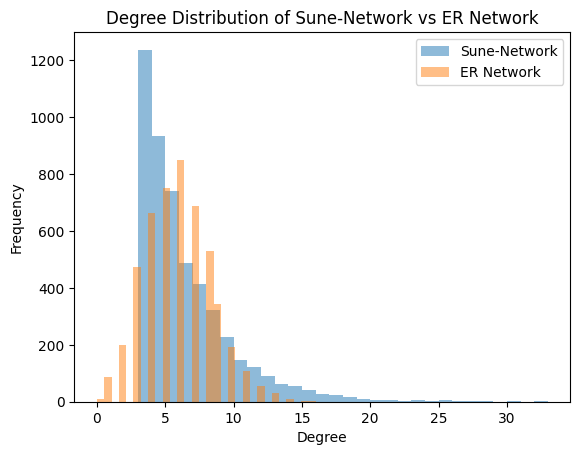

In [9]:
import matplotlib.pyplot as plt

# Get degree sequences for both networks
sune_degrees = [d for _, d in Sune_network.degree()]
er_degrees = [d for _, d in ER_network.degree()]

# Plot the degree distributions
plt.hist(sune_degrees, bins=30, alpha=0.5, label='Sune-Network')
plt.hist(er_degrees, bins=30, alpha=0.5, label='ER Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Sune-Network vs ER Network')
plt.legend()
plt.show()


##### Figure 1: Degree Distribution of Sune-Network vs ER Network

This figure compares the degree distributions of the **Sune-Network** and the **ER (Erdős-Rényi) Network**. Both networks are generated with 5000 nodes and the same number of edges, but differ in the mechanism of edge formation. 

- In the **Sune-Network**, new nodes connect to existing nodes with equal probability, without any preference for high-degree nodes. This results in a degree distribution with most nodes having relatively low degrees, and very few nodes having high degrees.
  
- The **ER Network** is generated randomly, with each pair of nodes having an equal probability of being connected. The degree distribution of the ER network is also centered around a low degree but shows a more bell-shaped distribution, as expected for a random graph.

The comparison shows that both networks exhibit similar degree distributions, but the Sune-Network displays slightly higher frequencies for low-degree nodes and a more gradual drop-off for higher-degree nodes compared to the ER network.


In [10]:
# Number of connected components in each network
sune_components = nx.number_connected_components(Sune_network)
er_components = nx.number_connected_components(ER_network)

print(f"Number of connected components in Sune-Network: {sune_components}")
print(f"Number of connected components in ER Network: {er_components}")

Number of connected components in Sune-Network: 1
Number of connected components in ER Network: 10


#### What are the differences between the ER network and the Sune-network? Explain in your own words.


**- Structure:** The Sune-Network grows by adding nodes over time, resulting in a more diverse structure with some nodes having more connections than others. The ER Network, on the other hand, is created by randomly connecting nodes in one step, which leads to a more uniform structure.

**- Degree Distribution:** The degree distribution in the Sune-Network is broader, with some nodes having more connections, while the ER network tends to have a narrower distribution with most nodes having degrees around the average.

## Part 2
### Simple network statistics and analysis

#### Build the network of Country Performers (We decided to add this part since it made the most sense, also so it is more easy to see if something went wrong. We hope not, we're very happy with the code :D)

##### Use a regular expression to extract all outgoing links from each of the pages you downloaded above.


In [11]:
import os
import re

folder_path = 'performer_files'

# Regular expression pattern to match wiki links
pattern = r'\[\[([^\]|#]+)(?:\|[^\]]+)?\]\]'

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        links = re.findall(pattern, text)
        unique_links = set(links)


##### For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.

In [12]:
folder_path = 'performer_files'
link_pattern = r'\[\[([^\]|#]+)(?:\|[^\]]+)?\]\]'  # Pattern to match wiki links
performer_pattern = r'\[\[([^\]|]+)(?:\|([^\]]+))?\]\]'  # Pattern to extract performer names

# Load performer names from 'performers.txt' into a set for quick lookup
with open('performers.txt', 'r', encoding='utf-8') as file:
    performers = re.findall(performer_pattern, file.read())
    performer_set = {p[0] for p in performers}

# Create a dictionary to store the performer links for each file
all_performer_links = {}

# Process each file in the folder and save matching performer links
for filename in filter(lambda f: f.endswith('.txt'), os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filename)
    
    with open(file_path, 'r', encoding='utf-8') as file:
        links = re.findall(link_pattern, file.read())
        performer_links = set(link for link in links if link in performer_set)
    
    # Store the performer links for this file
    all_performer_links[filename] = performer_links



##### Use a NetworkX DiGraph to store the network.

In [13]:
import networkx as nx

# Create a directed graph to store the performer network
G = nx.DiGraph()

# Add each performer as a node in the graph (performer names only)
G.add_nodes_from(performer_set)

# Edges between performers based on links in files
for filename, performer_links in all_performer_links.items():
    # Extract performer name from filename (replace underscore with space)
    performer_name = filename.replace('_', ' ').replace('.txt', '')
    
    # If this performer exists in the performer_set, proceed
    if performer_name in performer_set:
        for linked_performer in performer_links:
            if linked_performer in performer_set:  
                G.add_edge(performer_name, linked_performer)



##### Store the length of the content as an attribute of the node 

In [14]:
# Function to count words in a given text
def count_words(text):
    # Use regex to match words (ignoring symbols and punctuation)
    words = re.findall(r'\b\w+\b', text)
    return len(words)

# Process each file to get the content length and store it as a node attribute for the performer
for filename in filter(lambda f: f.endswith('.txt'), os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filename)
    
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        
        word_count = count_words(text)
        
        for performer in performer_set:
            if performer.replace(" ", "_") in filename:  # Match performer with filename
                # Store the word count as a node attribute for the performer
                G.nodes[performer]['word_count'] = word_count


##### When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then discard those disconnected nodes from the network.

In [15]:
# Check for disconnected nodes (nodes with 0 in-degree and 0 out-degree)
disconnected_nodes = [node for node in G.nodes() if G.degree(node) == 0]

# Remove disconnected nodes from the graph
G.remove_nodes_from(disconnected_nodes)


##### Finally, extract the largest component - it will make our work with visualisations much easier (note: removing isolated nodes (with no links) does not guarantee that you are left with the largest component).

In [16]:
# Find all weakly connected components
weakly_connected_components = list(nx.weakly_connected_components(G))

# Extract the largest component
largest_component = max(weakly_connected_components, key=len)

# Create a subgraph of the largest component
G_largest = G.subgraph(largest_component).copy()

print(f"Number of nodes in the largest component: {G_largest.number_of_nodes()}")
print(f"Number of edges in the largest component: {G_largest.number_of_edges()}")


Number of nodes in the largest component: 1939
Number of edges in the largest component: 17602


####  Simple network statistics and analysis

##### What is the number of nodes in the network?
The number of nodes is 1939 as seen in from the output. This means that there are 1939 performers in the network with some link to another performer.

##### More importantly, what is the number of links? 
The number of links in the network is 17602.

##### Plot the in and out-degree distributions for the entire network


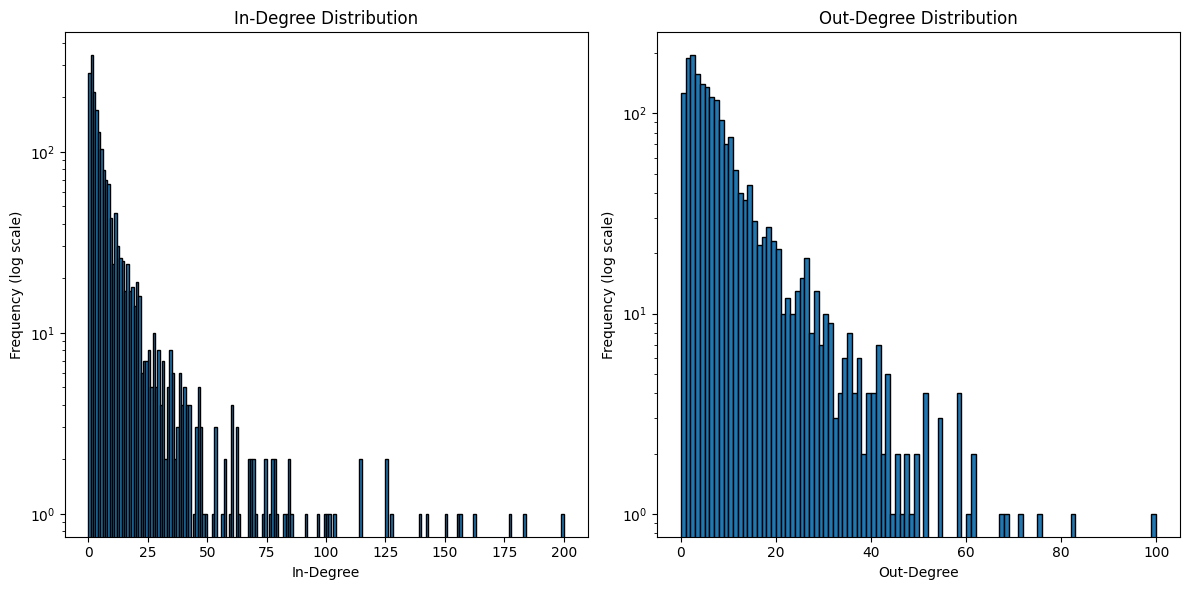

In [17]:
import matplotlib.pyplot as plt
# Get the in-degrees and out-degrees of all nodes in the graph
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

# Plot the in-degree distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # First subplot for in-degrees
plt.hist(in_degrees, bins=range(min(in_degrees), max(in_degrees) + 1), edgecolor='black', log=True)
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Frequency (log scale)')

# Plot the out-degree distribution
plt.subplot(1, 2, 2)  # Second subplot for out-degrees
plt.hist(out_degrees, bins=range(min(out_degrees), max(out_degrees) + 1), edgecolor='black', log=True)
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency (log scale)')
plt.tight_layout()
plt.show()


#### Figure 2: In-Degree and Out-Degree Distributions of the Network

This figure presents the in-degree and out-degree distributions of the network of performers. 

- The **left panel** shows the **in-degree distribution**, where the majority of nodes have low in-degree values, indicating that most performers are referenced by a small number of other performers. However, a few performers have very high in-degrees, suggesting that they are central and highly referenced within the network. The logarithmic y-axis emphasizes the disparity in the distribution, highlighting the power-law-like behavior typical in scale-free networks.

- The **right panel** depicts the **out-degree distribution**, where the majority of performers reference only a few others, but some performers have a high out-degree, meaning they collaborate with many other performers. This skewed distribution further supports the presence of hub-like nodes that dominate the connectivity within the network.

The distributions reflect a typical social network structure, with a few highly connected nodes (influential performers) and many less connected nodes.


##### Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?

In [18]:
# Calculate in-degrees and out-degrees for all nodes
in_degrees = dict(G.in_degree())  # Dictionary of node: in-degree
out_degrees = dict(G.out_degree())  # Dictionary of node: out-degree

# Sort performers by in-degree (descending order) and get the top 5
top_5_in_degree = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

# Sort performers by out-degree (descending order) and get the top 5
top_5_out_degree = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Performers by In-Degree (most referenced):")
for performer, degree in top_5_in_degree:
    print(f"{performer}: {degree} in-degree")

print("\nTop 5 Performers by Out-Degree (most referencing):")
for performer, degree in top_5_out_degree:
    print(f"{performer}: {degree} out-degree")


Top 5 Performers by In-Degree (most referenced):
Willie Nelson: 200 in-degree
Johnny Cash: 183 in-degree
Elvis Presley: 177 in-degree
Dolly Parton: 162 in-degree
George Jones: 156 in-degree

Top 5 Performers by Out-Degree (most referencing):
Hillary Lindsey: 100 out-degree
Pam Tillis: 82 out-degree
Randy Travis: 75 out-degree
Vince Gill: 71 out-degree
Patty Loveless: 68 out-degree


##### Top 5 Performers by In-Degree (Most Referenced):
1. **Willie Nelson**: 200 in-degree
2. **Johnny Cash**: 183 in-degree
3. **Elvis Presley**: 177 in-degree
4. **Dolly Parton**: 162 in-degree
5. **George Jones**: 156 in-degree

##### Top 5 Performers by Out-Degree (Most Referencing):
1. **Hillary Lindsey**: 100 out-degree
2. **Pam Tillis**: 82 out-degree
3. **Randy Travis**: 75 out-degree
4. **Vince Gill**: 71 out-degree
5. **Patty Loveless**: 68 out-degree

##### Findings and Commentary:
- The **in-degree leaders** are iconic figures in country music history, such as **Willie Nelson**, **Johnny Cash**, and **Elvis Presley**. These performers are central in the network and highly referenced, which aligns with their historical significance and widespread influence across multiple generations.
  
- On the other hand, the **out-degree leaders** include names like **Hillary Lindsey**, a prominent songwriter known for collaborating with many artists, which explains her high out-degree. Similarly, **Pam Tillis**, **Randy Travis**, and others are highly connected individuals who engage in many collaborations, making them key connectors within the network.

##### Conclusion:
The high in-degrees for legendary performers like **Willie Nelson** and **Johnny Cash** are expected due to their broad influence. However, the top out-degree performers, such as **Hillary Lindsey**, reflect their roles as collaborators or songwriters, which may not have been as immediately expected but makes sense given their work behind the scenes. This highlights different types of centrality in the network: iconic figures with high in-degrees versus key collaborators with high out-degrees.


##### What are the 10 pages with the longest wiki entries? (use the length of content attribute to figure this one out)?

In [19]:
# Get the word count attribute for each node (performer)
word_counts = {node: data.get('word_count', 0) for node, data in G.nodes(data=True)}

# Sort the nodes by word count (length of content) in descending order
top_10_longest_entries = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Pages with the Longest Wiki Entries:")
for performer, word_count in top_10_longest_entries:
    print(f"{performer}: {word_count} words")


Top 10 Pages with the Longest Wiki Entries:
Beyoncé: 62856 words
Taylor Swift: 56351 words
Miley Cyrus: 51262 words
Justin Bieber: 50693 words
Carrie Underwood: 45245 words
Justin Timberlake: 44775 words
Demi Lovato: 44189 words
Bob Dylan: 41087 words
Ed Sheeran: 36322 words
Elvis Presley: 33740 words


### Top 10 Pages with the Longest Wiki Entries:
1. **Beyoncé**: 62,856 words
2. **Taylor Swift**: 56,351 words
3. **Miley Cyrus**: 51,262 words
4. **Justin Bieber**: 50,693 words
5. **Carrie Underwood**: 45,245 words
6. **Justin Timberlake**: 44,775 words
7. **Demi Lovato**: 44,189 words
8. **Bob Dylan**: 41,087 words
9. **Ed Sheeran**: 36,322 words
10. **Elvis Presley**: 33,740 words

### Conclusion:
The performers with the longest Wikipedia entries are global superstars who have had significant impact both in terms of career length and influence. Performers like **Beyoncé**, **Taylor Swift**, and **Elvis Presley** not only have successful music careers but also extensive public personas that span multiple industries and decades. The presence of modern artists like **Ed Sheeran** and **Justin Bieber** reflects their substantial influence in the current music scene, while long-standing icons like **Bob Dylan** and **Elvis Presley** have similarly large entries due to their historical importance.


#### Visualizing the networks
##### For the sake of the visualisation, let's convert our network to undirected graph, we'll also use `nx.draw_kamada_kawai` to draw the resulting undirected network. Set the plot so that node-size depends on the node degree and make the node color depend on the length of content attribute.

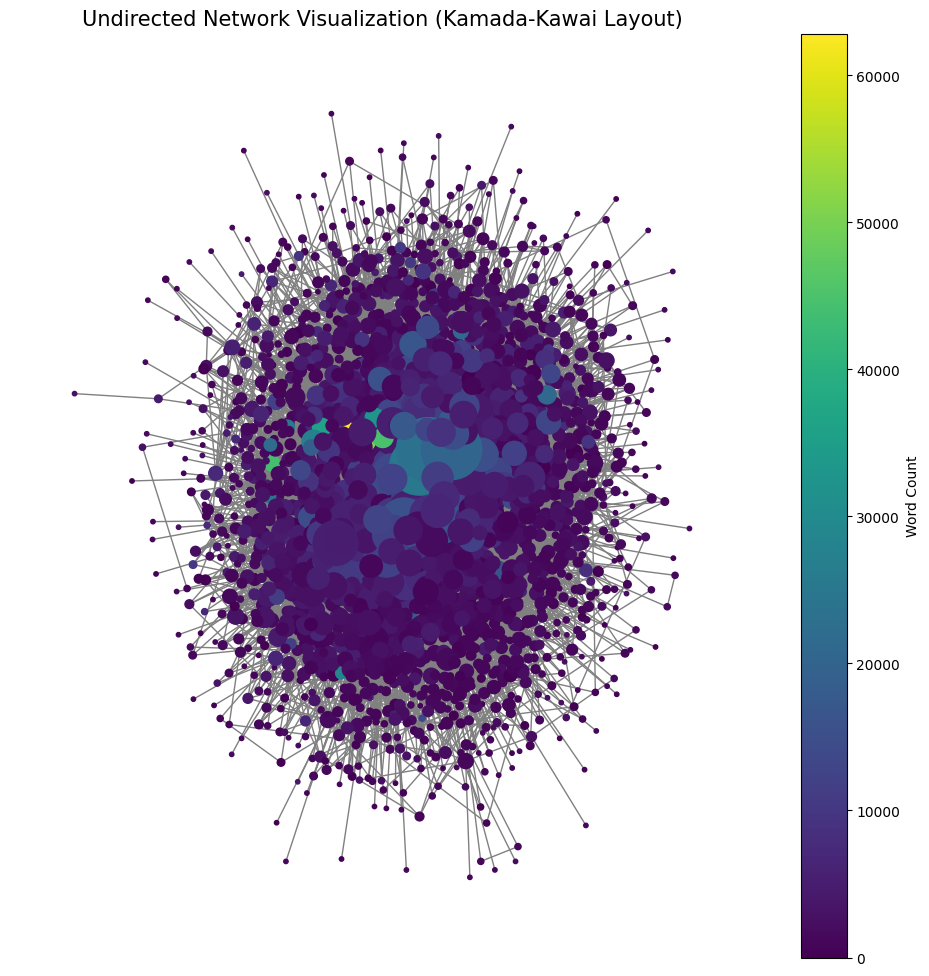

In [20]:
import matplotlib.pyplot as plt

G_und = G_largest.to_undirected()
node_sizes = [G_und.degree(n) * 10 for n in G_und.nodes()]  
node_colors = [G_und.nodes[n].get('word_count', 0) for n in G_und.nodes()]

cmap = plt.colormaps['viridis']

plt.figure(figsize=(12, 12))
pos = nx.kamada_kawai_layout(G_und) 

nodes = nx.draw_networkx_nodes(
    G_und, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=cmap,
    vmin=min(node_colors),
    vmax=max(node_colors)
)

nx.draw_networkx_edges(G_und, pos, edge_color='gray')

plt.colorbar(nodes, label='Word Count')

plt.title('Undirected Network Visualization (Kamada-Kawai Layout)', fontsize=15)
plt.axis('off') ## Its prettier without :)
plt.show()


##### Figure 3: Undirected Network Visualization (Kamada-Kawai Layout)

This figure shows the undirected network of performers, visualized using the Kamada-Kawai layout algorithm. Each node represents a performer, and the size of the node is proportional to its degree (number of connections). The color of the nodes corresponds to the length of the performer's Wikipedia entry, as indicated by the word count.

Performers with larger and brighter nodes are more connected within the network and have more detailed Wikipedia pages. In contrast, smaller and darker nodes represent less connected performers with shorter entries. 
